In [ ]:
## tools

from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [ ]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query ariv papers")
print(arxiv.name)

In [26]:
arxiv.invoke("What is the latest research on quantum computing?")

'Published: 2023-05-23\nTitle: Fast and energy-efficient non-volatile III-V-on-silicon photonic phase shifter based on memristors\nAuthors: Zhuoran Fang, Bassem Tossoun, Antoine Descos, Di Liang, Xue Huang, Geza Kurczveil, Arka Majumdar, Raymond G. Beausoleil\nSummary: Silicon photonics has evolved from lab research to commercial products in the\npast decade as it plays an increasingly crucial role in data communication for\nnext-generation data centers and high performance computing1. Recently,\nprogr'

In [27]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
print(wiki.name)

wikipedia


In [28]:
from dotenv import load_dotenv
load_dotenv()
import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [29]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()


In [30]:
tavily.invoke("Provide me all the recent AI news")

[{'title': 'Artificial Intelligence News - ScienceDaily',
  'url': 'https://www.sciencedaily.com/news/computers_math/artificial_intelligence/',
  'content': 'Artificial Intelligence News\n\nTop Headlines\n\nLatest Headlines\n\nEarlier Headlines\n\nThursday, April 3, 2025\n\nThursday, March 27, 2025\n\nWednesday, March 26, 2025\n\nTuesday, March 25, 2025\n\nWednesday, March 19, 2025\n\nTuesday, March 18, 2025\n\nMonday, March 17, 2025\n\nThursday, March 6, 2025\n\nWednesday, March 5, 2025\n\nTuesday, March 4, 2025\n\nWednesday, February 26, 2025\n\nTuesday, February 25, 2025\n\nFriday, February 21, 2025\n\nThursday, February 20, 2025\n\nWednesday, February 19, 2025 [...] Thursday, February 13, 2025\n\nMonday, February 10, 2025\n\nMonday, February 3, 2025\n\nWednesday, January 29, 2025\n\nTuesday, January 28, 2025\n\nMonday, January 27, 2025\n\nTuesday, January 21, 2025\n\nThursday, January 16, 2025\n\nWednesday, January 15, 2025\n\nTuesday, January 14, 2025\n\nThursday, January 9, 2025\

In [31]:
## combine all tools 
tools = [arxiv,wiki,tavily]

In [32]:
## Intialize the LLM model

from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen-qwq-32b")

In [33]:
llm.invoke("What is AI?")

AIMessage(content='\n<think>\nOkay, so the user is asking, "What is AI?" Let me start by breaking down the term itself. AI stands for Artificial Intelligence. But what does that really mean? I remember from my studies that AI is a broad field in computer science focused on creating systems that can perform tasks that typically require human intelligence. But I should explain that more clearly.\n\nFirst, maybe I should define AI in simple terms. It\'s about making machines intelligent. But intelligence here can mean different things. There\'s the thinking humanly aspect, like mimicking human thought processes, and the acting rationally aspect, where the machine makes optimal decisions. Maybe I should mention those two types of intelligence from the philosophy part of AI.\n\nThen, I should categorize AI into types. There\'s the distinction between weak AI and strong AI. Weak AI is designed for specific tasks, like voice recognition or image processing. Examples might include Siri or Alex

In [34]:
llm_with_tools=llm.bind_tools(tools=tools)

In [35]:
llm_with_tools.invoke("What is the recent news on ai?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_jad2', 'function': {'arguments': '{"query": "Recent news on AI"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 246, 'prompt_tokens': 356, 'total_tokens': 602, 'completion_time': 0.611091721, 'prompt_time': 0.045411662, 'queue_time': 0.7735387499999999, 'total_time': 0.656503383}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_512a3da6bb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-4942e2e4-7574-466d-a810-f0cb7b4c85be-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'Recent news on AI'}, 'id': 'call_jad2', 'type': 'tool_call'}], usage_metadata={'input_tokens': 356, 'output_tokens': 246, 'total_tokens': 602})

In [36]:
llm_with_tools.invoke("What is ml?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_s2vx', 'function': {'arguments': '{"query": "Machine Learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 272, 'prompt_tokens': 352, 'total_tokens': 624, 'completion_time': 0.659985429, 'prompt_time': 0.021646209, 'queue_time': 0.255454513, 'total_time': 0.681631638}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_a91d9c2cfb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-9cbf0891-0afe-49b2-9597-e329a9d04db6-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Machine Learning'}, 'id': 'call_s2vx', 'type': 'tool_call'}], usage_metadata={'input_tokens': 352, 'output_tokens': 272, 'total_tokens': 624})

#### WORKFLOW

In [45]:
#State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

In [46]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage],add_messages]

In [47]:
## Entire Chatbot with Langgraph

from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

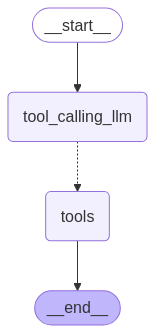

In [48]:
def tool_calling_llm(state: State):
    return {"messages": llm_with_tools.invoke(state["messages"])}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

# Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition,
)
builder.add_edge("tools", END)

graph = builder.compile()

# Visualize the graph
display(Image(graph.get_graph().draw_mermaid_png()))


In [49]:
messages=graph.invoke({"messages":"1706.03762"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_mxrt)
 Call ID: call_mxrt
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [50]:
messages=graph.invoke({"messages":"Hi my name is Archi"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hi my name is Archi
================================== Ai Message ==================================

Hello Archi! Nice to meet you. How can I assist you today? Feel free to ask me any questions or let me know if you need help with anything specific! 😊
